# Obtaining data for MA-DPG evaluation form example 02b


In [17]:
# Module imports
import os
import shutil
from pathlib import Path

import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# assume module imports
import examples.examples as examples
import examples.notebooks.MPEC.utils as utils
from assume import World
from assume.scenario.loader_csv import load_file, load_scenario_folder

## 1. Setting scenario parameters

In [2]:
if current_dir := os.path.basename(os.getcwd()) == "MPEC":
    %cd ../../..

example = "case_study_2013_pp"
# actual equilibrium prices
# because one can just see it actually


db_uri = "sqlite:///./examples/local_db/assume_db.db"
inputs_dir = "examples/inputs"

scenario = examples.available_examples[example]["scenario"]
study_case = examples.available_examples[example]["study_case"]

# Set up the database connection
db = create_engine(db_uri)

/hkfs/work/workspace_haic/scratch/tg3533-assume_case/assume


In [3]:
os.getcwd()

'/hkfs/work/workspace_haic/scratch/tg3533-assume_case/assume'

## 2. Retrieving the data from the best run

### 2.2 Getting the demand dataframe and power plant units

In [4]:
study_case_config = utils.load_config(inputs_dir, scenario, study_case)
start = pd.Timestamp(study_case_config["start_date"])
end = pd.Timestamp(study_case_config["end_date"])

index = pd.date_range(
    start=start,
    end=end,
    freq=study_case_config["time_step"],
)


In [5]:
pp_units = pd.read_csv(
    os.path.join(inputs_dir, scenario, "powerplant_units.csv"), index_col=0
)
pp_units

,technology,max_power,min_power,fuel_type,additional_cost,efficiency,start_up_cost,shut_down_cost,EE_region,emission_factor,bidding_EOM,unit_operator
OCGT_00,combined cycle gas turbine,1268,0,natural gas,64.683951,0.343988,0.0,0.0,0,0.198,powerplant_energy_naive,eom_operator
OCGT_02,combined cycle gas turbine,149,0,natural gas,64.683951,0.326697,0.0,0.0,2,0.198,powerplant_energy_naive,eom_operator
OCGT_03,combined cycle gas turbine,2083,0,natural gas,64.683951,0.516462,0.0,0.0,3,0.198,powerplant_energy_naive,eom_operator
OCGT_04,combined cycle gas turbine,34,0,natural gas,64.683951,0.318492,0.0,0.0,4,0.198,powerplant_energy_naive,eom_operator
OCGT_05,combined cycle gas turbine,156,0,natural gas,64.683951,0.475003,0.0,0.0,5,0.198,powerplant_energy_naive,eom_operator
OCGT_06,combined cycle gas turbine,681,0,natural gas,64.683951,0.554620,0.0,0.0,6,0.198,powerplant_energy_naive,eom_operator
OCGT_07,combined cycle gas turbine,160,0,natural gas,64.683951,0.362656,0.0,0.0,7,0.198,powerplant_energy_naive,eom_operator
OCGT_08,combined cycle gas turbine,83,0,natural gas,64.683951,0.355720,0.0,0.0,8,0.198,powerplant_energy_naive,eom_operator
OCGT_09,combined cycle gas turbine,1293,0,natural gas,64.683951,0.586930,0.0,0.0,9,0.198,powerplant_energy_naive,eom_operator
solar_00,solar_0,5071,0,renewable,0.010000,1.000000,0.0,0.0,0,0.000,renewable_energy_learning_single_bid,eom_operator


In [6]:
# read storages similar to pp_units
storage_units = pd.read_csv(
    os.path.join(inputs_dir, scenario, "storage_units.csv"), index_col=0
)
storage_units

,max_power_charge,technology,marginal_cost,efficiency_charge,efficiency_discharge,initial_soc,inflow,bidding_EOM,unit_operator,max_power_discharge,min_soc,max_soc,variable_cost_charge,variable_cost_discharge,additional_cost_charge,additional_cost_discharge,natural_inflow
battery_02,301,battery,0.0,0.973668,0.984288,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,289,0,1811,0.0,0.0,NaN,NaN,NaN
battery_05,351,battery,0.0,0.975312,0.981707,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,336,0,2111,0.0,0.0,NaN,NaN,NaN
battery_07,660,battery,0.0,0.983124,0.979856,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,636,0,3962,0.0,0.0,NaN,NaN,NaN
battery_08,221,battery,0.0,0.980670,0.983287,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,213,0,1329,0.0,0.0,NaN,NaN,NaN
battery_09,442,battery,0.0,0.983319,0.983756,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,427,0,2653,0.0,0.0,NaN,NaN,NaN
battery_00_0,707,battery,0.0,0.975792,0.973815,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,671,0,4242,0.0,0.0,NaN,NaN,NaN
battery_00_1,707,battery,0.0,0.972479,0.976748,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,671,0,4242,0.0,0.0,NaN,NaN,NaN
battery_01_0,522,battery,0.0,0.983573,0.976251,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,501,0,3135,0.0,0.0,NaN,NaN,NaN
battery_01_1,522,battery,0.0,0.986401,0.978295,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,504,0,3135,0.0,0.0,NaN,NaN,NaN
battery_03_0,746,battery,0.0,0.981792,0.977909,0.0,0.0,storage_energy_heuristic_flexable,eom_operator,716,0,4476,0.0,0.0,NaN,NaN,NaN


## NOTE: Delete base dispatch if you retrained

In [19]:
config = utils.load_config(inputs_dir, scenario)
if f"{study_case}_dispatch" in config:
    del config[f"{study_case}_dispatch"]
# Copy the base and new base_dispatch configuration
base_config = config[study_case].copy()
base_dispatch = config[study_case].copy()
base_dispatch["learning_config"] = base_config["learning_config"].copy()

# Modify learning config parameters for base_dispatch
base_dispatch["learning_config"].update(
    {
        "continue_learning": False,
        "trained_policies_save_path": "examples/inputs/future_markets_paper/learned_strategies/future_markets_paper_base_case_2013_pp_all/last_policies",
        "trained_policies_load_path": "examples/inputs/future_markets_paper/learned_strategies/future_markets_paper_base_case_2013_pp_all/last_policies",
        "training_episodes": 0,
        "episodes_collecting_initial_experience": 0,
    }
)

base_dispatch["learning_config"].update(
    {
        "learning_mode": False,
    }
)

# Update the config with both sections
config[study_case] = base_config
config[f"{study_case}_dispatch"] = base_dispatch

# Write the updated config back to file
utils.store_config(config, inputs_dir, scenario)

# Define paths
base_dir = Path(
    os.path.join(inputs_dir, scenario, f"learned_strategies/{scenario}_{study_case}")
)
dispatch_dir = Path(
    os.path.join(inputs_dir, scenario, f"learned_strategies/{study_case}_dispatch")
)

# Check if source directory exists
if not base_dir.exists():
    print(f"Source directory {base_dir} does not exist!")
elif dispatch_dir.exists():
    print(f"Target directory {dispatch_dir} already exists!")
else:
    # Create target directory if it doesn't exist
    dispatch_dir.parent.mkdir(parents=True, exist_ok=True)

    # Copy directory
    shutil.copytree(base_dir, dispatch_dir)
    print(f"Successfully copied {base_dir} to {dispatch_dir}")

world = World(database_uri=db_uri)

load_scenario_folder(world, inputs_dir, scenario, f"{study_case}_dispatch")

world.run()

Target directory examples/inputs/future_markets_paper/learned_strategies/base_case_2013_pp_all_dispatch already exists!
INFO:assume.world:Connected to the database
INFO:assume.scenario.loader_csv:Input files path: examples/inputs/future_markets_paper
INFO:assume.scenario.loader_csv:Study case: base_case_2013_pp_all_dispatch
INFO:assume.scenario.loader_csv:Simulation ID: future_markets_paper_base_case_2013_pp_all_dispatch
INFO:assume.scenario.loader_csv:unit_operators not found. Returning None
INFO:assume.scenario.loader_csv:exchange_units not found. Returning None
INFO:assume.scenario.loader_csv:industrial_dsm_units not found. Returning None
INFO:assume.scenario.loader_csv:residential_dsm_units not found. Returning None
INFO:assume.scenario.loader_csv:demand_df not found. Returning None
INFO:assume.scenario.loader_csv:exchanges_df not found. Returning None
INFO:assume.scenario.loader_csv:buses not found. Returning None
INFO:assume.scenario.loader_csv:lines not found. Returning None
INF

  0%|          | 0/5011200 [00:00<?, ?it/s]

ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-3' coro=<Container._check_inbox() running at /home/win/tg3533/venvs/assume-framework/lib64/python3.11/site-packages/mango/container/core.py:235> wait_for=<Future pending cb=[Task.__wakeup()]>>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-4' coro=<Agent._check_inbox() running at /home/win/tg3533/venvs/assume-framework/lib64/python3.11/site-packages/mango/agent/core.py:454> wait_for=<Future pending cb=[Task.__wakeup()]> cb=[Agent._raise_exceptions()]>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-5' coro=<Agent._check_inbox() running at /home/win/tg3533/venvs/assume-framework/lib64/python3.11/site-packages/mango/agent/core.py:454> wait_for=<Future pending cb=[Task.__wakeup()]> cb=[Agent._raise_exceptions()]>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-6' coro=<Agent._check_inbox() running at /h

Exception ignored in: <coroutine object Container._check_inbox at 0x1511a24ef520>
Traceback (most recent call last):
  File "/home/win/tg3533/venvs/assume-framework/lib64/python3.11/site-packages/mango/container/core.py", line 235, in _check_inbox
    data = await self.inbox.get()
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/asyncio/queues.py", line 160, in get
    getter.cancel()  # Just in case getter is not done yet.
    ^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/asyncio/futures.py", line 158, in cancel
    self.__schedule_callbacks()
  File "/usr/lib64/python3.11/asyncio/futures.py", line 173, in __schedule_callbacks
    self._loop.call_soon(callback, self, context=ctx)
  File "/usr/lib64/python3.11/asyncio/base_events.py", line 761, in call_soon
    self._check_closed()
  File "/usr/lib64/python3.11/asyncio/base_events.py", line 519, in _check_closed
    raise RuntimeError('Event loop is closed')
RuntimeError: Event loop is closed


ERROR:mango.agent.core:The check inbox task of export_agent_1 failed!
Traceback (most recent call last):
  File "/usr/lib64/python3.11/asyncio/queues.py", line 158, in get
    await getter
GeneratorExit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/win/tg3533/venvs/assume-framework/lib64/python3.11/site-packages/mango/agent/core.py", line 454, in _check_inbox
    message = await self.inbox.get()
              ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/asyncio/queues.py", line 160, in get
    getter.cancel()  # Just in case getter is not done yet.
    ^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/asyncio/futures.py", line 158, in cancel
    self.__schedule_callbacks()
  File "/usr/lib64/python3.11/asyncio/futures.py", line 173, in __schedule_callbacks
    self._loop.call_soon(callback, self, context=ctx)
  File "/usr/lib64/python3.11/asyncio/base_events.py", line 761, in call_soon
    self._check_closed()

future_markets_paper_base_case_2013_pp_all_dispatch 2013-02-27 23:00:00: 100%|█████████▉| 5007601/5011200 [02:11<00:00, 38179.79it/s]


### Get mc

Since we want to avoid logging the mc in assume itself, because this is slowing the simualtion down I will get them afterwards. Curretnly the script only runs with time-invariant mc. Hence I test here if that si still the case. 

In [20]:
units = world.unit_operators["eom_operator"].units
for name, unit in units.items():
    if (
        hasattr(unit, "marginal_cost")
        and unit.marginal_cost is not None
        and np.all(np.array(unit.marginal_cost) != 0)
    ):
        mc = np.array(unit.marginal_cost)
        # Check all values are the same
        assert np.all(mc == mc[0]), f"Marginal costs for {name} are not constant: {mc}"
        # Check none are zero
        assert np.all(mc != 0), f"Marginal costs for {name} contain zero: {mc}"
        print(f"{name}: marginal_cost = {mc[0]}")
    else:
        # For storages or units without marginal_cost, use average of additional_cost_charge and additional_cost_discharge
        charge = getattr(unit, "additional_cost_charge", None)
        discharge = getattr(unit, "additional_cost_discharge", None)
        if charge is not None and discharge is not None:
            avg_cost = (charge + discharge) / 2
            print(f"{name}: average storage cost = {avg_cost}")
        else:
            print(f"{name}: No marginal or storage cost found!")

OCGT_00: marginal_cost = 108.11267253306886
OCGT_02: marginal_cost = 110.411156612333
OCGT_03: marginal_cost = 93.60950107473732
OCGT_04: marginal_cost = 111.58919990722248
OCGT_05: marginal_cost = 96.13414310394893
OCGT_06: marginal_cost = 91.61939449831588
OCGT_07: marginal_cost = 105.87708199414465
OCGT_08: marginal_cost = 106.6803455709629
OCGT_09: marginal_cost = 90.13663309248294
solar_00: marginal_cost = 0.01
solar_02: marginal_cost = 0.01
solar_05: marginal_cost = 0.0099999999999999
solar_08: marginal_cost = 0.01
wind_offshore_00: marginal_cost = 0.015
wind_offshore_06: marginal_cost = 0.015
wind_offshore_07: marginal_cost = 0.015
wind_onshore_01: marginal_cost = 0.015
wind_onshore_02: marginal_cost = 0.015
wind_onshore_04: marginal_cost = 0.015
wind_onshore_05: marginal_cost = 0.015
wind_onshore_08: marginal_cost = 0.015
wind_onshore_09: marginal_cost = 0.015
OCGT_01_0: marginal_cost = 106.15561590879241
OCGT_01_1: marginal_cost = 90.23925796096212
OCGT_01_2: marginal_cost = 9

In [21]:
# Suppose unit.marginal_cost is a list/array of values for each unit
# Collect all marginal_cost series in a dict
costs_dict = {
    name: (
        unit.marginal_cost
        if hasattr(unit, "marginal_cost")
        and unit.marginal_cost is not None
        and np.all(np.array(unit.marginal_cost) != 0)
        else (
            (
                getattr(unit, "additional_cost_charge", None)
                + getattr(unit, "additional_cost_discharge", None)
            )
            / 2
            if getattr(unit, "additional_cost_charge", None) is not None
            and getattr(unit, "additional_cost_discharge", None) is not None
            else None
        )
    )
    for name, unit in world.unit_operators["eom_operator"].units.items()
}

# Find the length of the series (assuming all are the same length)
n = len(next(iter(costs_dict.values())))

# Optionally, create a time index (e.g., hourly from start_date)
start = pd.Timestamp(study_case_config["start_date"])
time_index = pd.date_range(start=start, periods=n, freq="h")  # adjust freq as needed

# Create the DataFrame
marginal_costs_df = pd.DataFrame(costs_dict, index=time_index)
marginal_costs_df

,OCGT_00,OCGT_02,OCGT_03,OCGT_04,OCGT_05,OCGT_06,OCGT_07,OCGT_08,OCGT_09,solar_00,...,Waldshut,Erzhausen,Witznau,Hohenwarte II,Säckingen,Waldeck II,Wehr,Markersbach,Goldisthal,demand
2013-01-01 00:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-01-01 01:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-01-01 02:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-01-01 03:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-01-01 04:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-27 20:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-02-27 21:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-02-27 22:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None
2013-02-27 23:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None


In [22]:
query = (
    f"SELECT * FROM market_orders where simulation = '{scenario}_{study_case}_dispatch'"
)
market_orders_df = pd.read_sql(query, db)
market_orders_df

,start_time,end_time,price,volume,node,bid_id,unit_id,bid_type,accepted_price,accepted_volume,market_id,simulation
0,2013-01-01 01:00:00.000000,2013-01-01 02:00:00.000000,-188.560638,1753.290000,node0,wind_offshore_00_1,wind_offshore_00,SB,4.903359,1753.2900,EOM,future_markets_paper_base_case_2013_pp_all_dis...
1,2013-01-01 01:00:00.000000,2013-01-01 02:00:00.000000,-256.542023,1837.412500,node0,wind_offshore_06_1,wind_offshore_06,SB,4.903359,1837.4125,EOM,future_markets_paper_base_case_2013_pp_all_dis...
2,2013-01-01 01:00:00.000000,2013-01-01 02:00:00.000000,-220.781982,3303.800500,node0,wind_offshore_07_1,wind_offshore_07,SB,4.903359,3303.8005,EOM,future_markets_paper_base_case_2013_pp_all_dis...
3,2013-01-01 01:00:00.000000,2013-01-01 02:00:00.000000,-37.446377,77.073500,node0,wind_onshore_01_1,wind_onshore_01,SB,4.903359,77.0735,EOM,future_markets_paper_base_case_2013_pp_all_dis...
4,2013-01-01 01:00:00.000000,2013-01-01 02:00:00.000000,-234.568115,4422.618000,node0,wind_onshore_02_1,wind_onshore_02,SB,4.903359,4422.6180,EOM,future_markets_paper_base_case_2013_pp_all_dis...
...,...,...,...,...,...,...,...,...,...,...,...,...
149370,2013-02-27 23:00:00.000000,2013-02-28 00:00:00.000000,26.487760,-2317.716319,node0,demand_6,demand,SB,0.000000,0.0000,EOM,future_markets_paper_base_case_2013_pp_all_dis...
149371,2013-02-27 23:00:00.000000,2013-02-28 00:00:00.000000,11.251087,-2317.716319,node0,demand_7,demand,SB,0.000000,0.0000,EOM,future_markets_paper_base_case_2013_pp_all_dis...
149372,2013-02-27 23:00:00.000000,2013-02-28 00:00:00.000000,4.903359,-2317.716319,node0,demand_8,demand,SB,0.000000,0.0000,EOM,future_markets_paper_base_case_2013_pp_all_dis...
149373,2013-02-27 23:00:00.000000,2013-02-28 00:00:00.000000,2.189241,-2317.716319,node0,demand_9,demand,SB,0.000000,0.0000,EOM,future_markets_paper_base_case_2013_pp_all_dis...


# 3. Establish Sampling of days to be analysed

Here we sample from the entire training data a subset of days, for which we test if the profit of all drl agents is similar to their MPEC formulation. 

In [24]:
sampled_indices = utils.sample_seasonal_weeks(marginal_costs_df.index)
# TODO: LÖSCHEN NUR FÜR FASTER SOLAVBIILTY AS 1 Week runs into run time limit
sampled_indices = sampled_indices[:1]

sampled_indices = [marginal_costs_df.index.date[0]]
sampled_indices

Spring complete weeks: []
Summer complete weeks: []
Fall complete weeks: []
Winter complete weeks: [np.uint32(2), np.uint32(3), np.uint32(4), np.uint32(5), np.uint32(6), np.uint32(7), np.uint32(8)]


[datetime.date(2013, 1, 1)]

## 3.1 Get sample subset

In [25]:
marginal_costs_df["date"] = marginal_costs_df.index.date
sample_marginal_costs_df = marginal_costs_df.loc[marginal_costs_df["date"].isin(sampled_indices)]
rest_marginal_costs_df = marginal_costs_df.loc[~marginal_costs_df["date"].isin(sampled_indices)]
sample_marginal_costs_df

,OCGT_00,OCGT_02,OCGT_03,OCGT_04,OCGT_05,OCGT_06,OCGT_07,OCGT_08,OCGT_09,solar_00,...,Erzhausen,Witznau,Hohenwarte II,Säckingen,Waldeck II,Wehr,Markersbach,Goldisthal,demand,date
2013-01-01 00:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 01:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 02:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 03:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 04:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 05:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 06:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 07:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 08:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01
2013-01-01 09:00:00,108.112673,110.411157,93.609501,111.5892,96.134143,91.619394,105.877082,106.680346,90.136633,0.01,...,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,None,2013-01-01


In [26]:
query = (
    f"SELECT * FROM unit_dispatch where simulation = '{scenario}_{study_case}_dispatch'"
)
dispatch_df = pd.read_sql(query, db)
# dispatch_df = dispatch_df.drop_duplicates(subset=["time", "unit"], keep="first")

dispatch_df = dispatch_df.sort_values("time")


dispatch_df.index = pd.to_datetime(dispatch_df["time"])
dispatch_df.drop(columns=["time"], inplace=True)
dispatch_df["date"] = dispatch_df.index.date

# merge marginal_costs based on unit and time
# Reset index to get time as a column
mc_long = marginal_costs_df.reset_index().melt(
    id_vars="index", var_name="unit", value_name="marginal_cost"
)
mc_long = mc_long.rename(columns={"index": "time"})  # Rename index to time if needed

# Now merge with dispatch_df on 'time' and 'unit'
dispatch_df = dispatch_df.merge(mc_long, on=["time", "unit"], how="left")

sample_dispatch_df = dispatch_df.loc[dispatch_df["date"].isin(sampled_indices)]
rest_dispatch_df = dispatch_df.loc[~dispatch_df["date"].isin(sampled_indices)]
sample_dispatch_df

,time,power,soc,energy_generation_costs,unit,heat,energy_cashflow,total_costs,simulation,date,marginal_cost
0,2013-01-01 00:00:00,0.0,NaN,0.0,OCGT_00,0.0,NaN,NaN,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,108.112673
1,2013-01-01 00:00:00,0.0,0.0,0.0,battery_03_0,NaN,NaN,NaN,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.0
2,2013-01-01 00:00:00,0.0,0.0,0.0,battery_01_1,NaN,NaN,NaN,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.0
3,2013-01-01 00:00:00,0.0,0.0,0.0,battery_01_0,NaN,NaN,NaN,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.0
4,2013-01-01 00:00:00,0.0,0.0,0.0,battery_00_0,NaN,NaN,NaN,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2395,2013-01-01 23:00:00,0.0,NaN,0.0,solar_03_0,0.0,0.0,0.0,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.01
2396,2013-01-01 23:00:00,0.0,NaN,0.0,solar_01_2,0.0,0.0,0.0,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.01
2397,2013-01-01 23:00:00,0.0,NaN,0.0,solar_01_1,0.0,0.0,0.0,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.01
2398,2013-01-01 23:00:00,0.0,NaN,0.0,solar_01_0,0.0,0.0,0.0,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,0.01


In [27]:
# sample market orders as well
market_orders_df.index = pd.to_datetime(market_orders_df["start_time"])
market_orders_df = market_orders_df.drop(columns=["start_time"])
market_orders_df["date"] = market_orders_df.index.date

sample_market_orders_df = market_orders_df.loc[
    market_orders_df["date"].isin(sampled_indices)
]
rest_market_orders_df = market_orders_df.loc[
    ~market_orders_df["date"].isin(sampled_indices)
]
sample_market_orders_df.head()

,end_time,price,volume,node,bid_id,unit_id,bid_type,accepted_price,accepted_volume,market_id,simulation,date
start_time,,,,,,,,,,,,
2013-01-01 01:00:00,2013-01-01 02:00:00.000000,-188.560638,1753.2900,node0,wind_offshore_00_1,wind_offshore_00,SB,4.903359,1753.2900,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01
2013-01-01 01:00:00,2013-01-01 02:00:00.000000,-256.542023,1837.4125,node0,wind_offshore_06_1,wind_offshore_06,SB,4.903359,1837.4125,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01
2013-01-01 01:00:00,2013-01-01 02:00:00.000000,-220.781982,3303.8005,node0,wind_offshore_07_1,wind_offshore_07,SB,4.903359,3303.8005,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01
2013-01-01 01:00:00,2013-01-01 02:00:00.000000,-37.446377,77.0735,node0,wind_onshore_01_1,wind_onshore_01,SB,4.903359,77.0735,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01
2013-01-01 01:00:00,2013-01-01 02:00:00.000000,-234.568115,4422.6180,node0,wind_onshore_02_1,wind_onshore_02,SB,4.903359,4422.6180,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01


## 3.2 Handle multiple demand bids

In [28]:
sample_demand_orders_df = (
    sample_market_orders_df.loc[sample_market_orders_df["unit_id"] == "demand"].copy()
)
sample_demand_orders_df["bid_num"] = (
    sample_demand_orders_df["bid_id"].str.extract(r"(\d+)$").astype(int)
)

demand_bids = max(sample_demand_orders_df["bid_num"])
demand_bids

10

In [29]:
# 2) Auf wide pivoten: price/volume je bid_num als eigene Spalten
wide = sample_demand_orders_df.pivot_table(
    index="start_time",
    columns="bid_num",
    values=["price", "volume"],
    aggfunc="first",  # falls eindeutig pro Zeit/Bid
)

# 3) Spaltennamen glätten zu price_1, volume_1, ...
wide.columns = [f"{lvl0}_{lvl1}" for lvl0, lvl1 in wide.columns]
wide = wide.sort_index(axis=1)  # optional: Spalten sortieren

# 4) Fehlende Werte auffüllen (falls gewünscht)
wide = wide.fillna(0)

# 5) demand_df bauen (Index = Zeit)
demand_df = wide.copy()
demand_df.head()

,price_1,price_10,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,volume_1,volume_10,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9
start_time,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 02:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 03:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 04:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 05:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319


## 2.3 Bi-Level Optimisation 

### Defintion for case

In [30]:
big_w = 100000  # weight for duality gap objective
k_max = 2  # maximum multiplier for strategic bidding

In [47]:
def create_gens_df(pp_units, dispatch_df):
    gens_df = pp_units.copy()

    # Transform gen_df into the format that is expected by the optimization problem
    # g_max	mc	u_0	g_0	r_up	r_down	k_up	k_down
    gens_df = gens_df.reset_index()
    gens_df = gens_df.rename(columns={"max_power": "g_max", "min_power": "u_0"})
    gens_df["r_up"] = gens_df["g_max"]  # ramping up constraints
    gens_df["r_down"] = gens_df["g_max"]  # ramping down constraints
    gens_df["k_up"] = 0  # start up costs
    gens_df["k_down"] = 0  # shut down costs
    gens_df["g_0"] = 0  # start with no power output

    # get average mc from dispatch_df per unit name
    mc = pd.DataFrame(dispatch_df.groupby("unit")["marginal_cost"].mean()).reset_index()

    # based on name and unit column join mc into gens_df
    gens_df = gens_df.merge(mc, left_on="index", right_on="unit", how="right")
    gens_df = gens_df.rename(columns={"marginal_cost": "mc"})
    return gens_df

### Input data transformation for Optimisation Problem 

In [48]:
# gens
gens_df = create_gens_df(pp_units, dispatch_df[dispatch_df["unit"].isin(pp_units.index)])
gens_df.head(15)

,index,technology,g_max,u_0,fuel_type,additional_cost,efficiency,start_up_cost,shut_down_cost,EE_region,emission_factor,bidding_EOM,unit_operator,r_up,r_down,k_up,k_down,g_0,unit,mc
0,OCGT_00,combined cycle gas turbine,1268,0,natural gas,64.683951,0.343988,0.0,0.0,0,0.198,powerplant_energy_naive,eom_operator,1268,1268,0,0,0,OCGT_00,108.112673
1,OCGT_01_0,combined cycle gas turbine,8882,0,natural gas,64.407026,0.357831,0.0,0.0,1,0.198,powerplant_energy_naive,eom_operator,8882,8882,0,0,0,OCGT_01_0,106.155616
2,OCGT_01_1,combined cycle gas turbine,8882,0,natural gas,64.407026,0.578306,0.0,0.0,1,0.198,powerplant_energy_naive,eom_operator,8882,8882,0,0,0,OCGT_01_1,90.239258
3,OCGT_01_2,combined cycle gas turbine,8882,0,natural gas,64.407026,0.461251,0.0,0.0,1,0.198,powerplant_energy_naive,eom_operator,8882,8882,0,0,0,OCGT_01_2,96.794919
4,OCGT_01_3,combined cycle gas turbine,8882,0,natural gas,64.407026,0.365247,0.0,0.0,1,0.198,powerplant_energy_naive,eom_operator,8882,8882,0,0,0,OCGT_01_3,105.307929
5,OCGT_01_4,combined cycle gas turbine,8882,0,natural gas,64.407026,0.457276,0.0,0.0,1,0.198,powerplant_energy_naive,eom_operator,8882,8882,0,0,0,OCGT_01_4,97.076454
6,OCGT_02,combined cycle gas turbine,149,0,natural gas,64.683951,0.326697,0.0,0.0,2,0.198,powerplant_energy_naive,eom_operator,149,149,0,0,0,OCGT_02,110.411157
7,OCGT_03,combined cycle gas turbine,2083,0,natural gas,64.683951,0.516462,0.0,0.0,3,0.198,powerplant_energy_naive,eom_operator,2083,2083,0,0,0,OCGT_03,93.609501
8,OCGT_04,combined cycle gas turbine,34,0,natural gas,64.683951,0.318492,0.0,0.0,4,0.198,powerplant_energy_naive,eom_operator,34,34,0,0,0,OCGT_04,111.5892
9,OCGT_05,combined cycle gas turbine,156,0,natural gas,64.683951,0.475003,0.0,0.0,5,0.198,powerplant_energy_naive,eom_operator,156,156,0,0,0,OCGT_05,96.134143


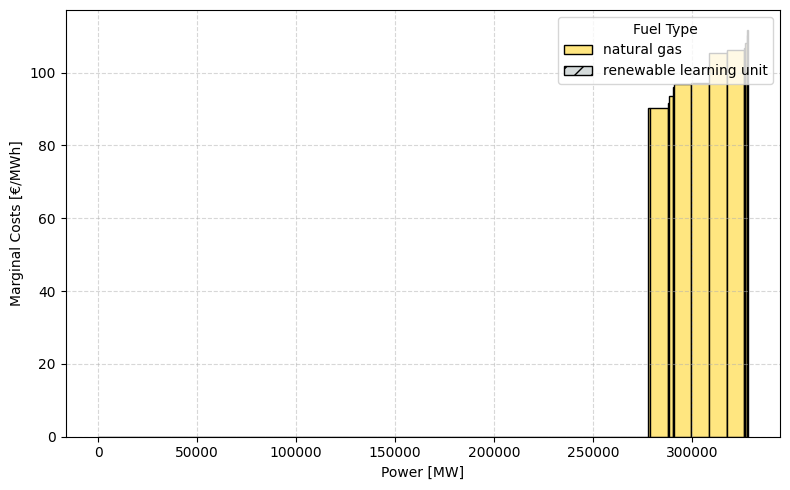

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Sortiere nach marginalen Kosten (mc)
gens_sorted = gens_df.sort_values("mc").reset_index(drop=True)

# Farben und Muster für die Balken
color_map = {
    "natural gas": "#ffe680",
    "renewable learning unit": "#d5dbdb",  # gleiche Farbe wie gas, aber mit Muster
}
hatch_map = {
    "renewable learning unit": "//",
}

# Linke Kante für jeden Balken
left_edges = np.concatenate([[0], gens_sorted["g_max"].cumsum()[:-1]])

plt.figure(figsize=(8, 5))

bars = []
labels = []
for i, row in gens_sorted.iterrows():
    # Fuel-Type bestimmen
    if "bidding_EOM" in row and row["bidding_EOM"] == "renewable_energy_learning_single_bid":
        fuel = "renewable learning unit"
    else:
        fuel = row["fuel_type"]
    color = color_map.get(fuel, "#cccccc")
    hatch = hatch_map.get(fuel, None)
    bar = plt.bar(
        left_edges[i],
        row["mc"],
        width=row["g_max"],
        align="edge",
        color=color,
        edgecolor="black",
        hatch=hatch,
        label=fuel if fuel not in labels else "",
    )
    bars.append(bar)
    labels.append(fuel)

# Legende manuell erstellen, damit jede Kategorie nur einmal erscheint
handles = []
legend_labels = []
for fuel, color in color_map.items():
    hatch = hatch_map.get(fuel, None)
    handle = plt.Rectangle(
        (0, 0), 1, 1, facecolor=color, edgecolor="black", hatch=hatch
    )
    handles.append(handle)
    legend_labels.append(fuel)

plt.legend(handles, legend_labels, title="Fuel Type", loc="upper right")
plt.xlabel("Power [MW]")
plt.ylabel("Marginal Costs [€/MWh]")
plt.grid(True, linestyle="--", alpha=0.5)
#plt.xlim(0, 15000)
plt.tight_layout()
plt.show()

### Translate actions of RL model into k_values

In [53]:
# Merge on both 'unit_id' and 'time' columns
merged_df = sample_market_orders_df.merge(
    sample_dispatch_df[["unit", "time", "marginal_cost"]].reset_index(),
    left_on=["unit_id", "start_time"],
    right_on=["unit", "time"],
    how="left",
)
merged_df.head()

,end_time,price,volume,node,bid_id,unit_id,bid_type,accepted_price,accepted_volume,market_id,simulation,date,index,unit,time,marginal_cost
0,2013-01-01 02:00:00.000000,-188.560638,1753.2900,node0,wind_offshore_00_1,wind_offshore_00,SB,4.903359,1753.2900,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,105,wind_offshore_00,2013-01-01 01:00:00,0.015
1,2013-01-01 02:00:00.000000,-256.542023,1837.4125,node0,wind_offshore_06_1,wind_offshore_06,SB,4.903359,1837.4125,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,166,wind_offshore_06,2013-01-01 01:00:00,0.015
2,2013-01-01 02:00:00.000000,-220.781982,3303.8005,node0,wind_offshore_07_1,wind_offshore_07,SB,4.903359,3303.8005,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,176,wind_offshore_07,2013-01-01 01:00:00,0.015
3,2013-01-01 02:00:00.000000,-37.446377,77.0735,node0,wind_onshore_01_1,wind_onshore_01,SB,4.903359,77.0735,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,178,wind_onshore_01,2013-01-01 01:00:00,0.015
4,2013-01-01 02:00:00.000000,-234.568115,4422.6180,node0,wind_onshore_02_1,wind_onshore_02,SB,4.903359,4422.6180,EOM,future_markets_paper_base_case_2013_pp_all_dis...,2013-01-01,181,wind_onshore_02,2013-01-01 01:00:00,0.015


In [54]:
merged_df["bid_id"].unique()

array(['wind_offshore_00_1', 'wind_offshore_06_1', 'wind_offshore_07_1',
       'wind_onshore_01_1', 'wind_onshore_02_1', 'wind_onshore_04_1',
       'wind_onshore_05_1', 'wind_onshore_08_1', 'wind_onshore_09_1',
       'wind_onshore_00_0_1', 'wind_onshore_00_1_1',
       'wind_onshore_00_2_1', 'wind_onshore_03_0_1',
       'wind_onshore_03_1_1', 'wind_onshore_06_0_1',
       'wind_onshore_07_0_1', 'wind_onshore_07_1_1',
       'wind_onshore_07_2_1', 'wind_onshore_07_3_1', 'battery_02_1',
       'battery_05_1', 'battery_07_1', 'battery_08_1', 'battery_09_1',
       'battery_00_0_1', 'battery_00_1_1', 'battery_01_0_1',
       'battery_01_1_1', 'battery_03_0_1', 'battery_03_1_1',
       'battery_03_2_1', 'battery_04_0_1', 'battery_04_1_1',
       'battery_04_2_1', 'battery_06_0_1', 'battery_06_1_1',
       'battery_06_2_1', 'Tanzmühle - Rabenleite_1',
       'Schwarzenbachwerk_1', 'Leitzach II_1', 'Leitzach I_1',
       'Hohenwarte I_1', 'Bleiloch_1', 'Wendefurth_1', 'Glems_1',
       'R

In [55]:
k_df = merged_df[["unit_id", "time", "price"]].copy()[merged_df["volume"] > 0]

k_df

,unit_id,time,price
0,wind_offshore_00,2013-01-01 01:00:00,-188.560638
1,wind_offshore_06,2013-01-01 01:00:00,-256.542023
2,wind_offshore_07,2013-01-01 01:00:00,-220.781982
3,wind_onshore_01,2013-01-01 01:00:00,-37.446377
4,wind_onshore_02,2013-01-01 01:00:00,-234.568115
...,...,...,...
2287,OCGT_01_2,2013-01-01 23:00:00,96.794919
2288,OCGT_01_3,2013-01-01 23:00:00,105.307929
2289,OCGT_01_4,2013-01-01 23:00:00,97.076454
2330,Hohenwarte I,2013-01-01 23:00:00,79.752434


In [59]:
def obtain_k_values(k_df, gens_df):
    mc_mapping = dict(zip(gens_df["index"], gens_df["mc"]))
    k_df["gens_df_mc"] = k_df["unit_id"].map(mc_mapping)

    # transformed actions into k_values, one per generator
    k_df["k"] = k_df["price"] / k_df["gens_df_mc"]

    # replace inf with 0
    k_df["k"] = k_df["k"].replace(np.inf, 0)

    # delete rows where unit_id is none
    k_df = k_df[k_df["unit_id"].notna()]

    k_values_df = k_df.pivot(index="time", columns="unit_id", values="k")
    # k_values_df.reset_index(inplace=True)

    # sort columns to match the order of the columns in the gens_df
    k_values_df = k_values_df[gens_df["index"].values]
    k_values_df["date"] = k_values_df.index.date
    return k_values_df


In [60]:
k_values_df = obtain_k_values(k_df, gens_df)
k_values_df.head()

unit_id,OCGT_00,OCGT_01_0,OCGT_01_1,OCGT_01_2,OCGT_01_3,OCGT_01_4,OCGT_02,OCGT_03,OCGT_04,OCGT_05,...,wind_onshore_05,wind_onshore_06_0,wind_onshore_06_1,wind_onshore_07_0,wind_onshore_07_1,wind_onshore_07_2,wind_onshore_07_3,wind_onshore_08,wind_onshore_09,date
time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-18506.703695,-15789.269002,8676.178996,-272.636445,-14908.574422,-19460.622152,-19795.977783,-14784.858195,-4550.151571,2013-01-01
2013-01-01 02:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-18681.628418,-16688.813273,6742.383321,-4783.821615,-14943.162028,-19424.879964,-19783.632406,-14491.713460,-5058.877055,2013-01-01
2013-01-01 03:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-19016.141764,-17438.429769,3155.356089,-4034.193420,-14921.423340,-19428.438314,-19773.956299,-13733.532715,-5880.335490,2013-01-01
2013-01-01 04:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-19284.326172,-17942.858887,-4363.470968,-6460.483297,-15234.735107,-19413.970947,-19749.171956,-13565.957642,-7210.004679,2013-01-01
2013-01-01 05:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-19433.534749,-17977.756755,-7940.333557,-7196.411133,-15589.615885,-19356.532796,-19693.627930,-13579.560343,-8243.970235,2013-01-01


In [63]:
# Index-Check
print("availability_df index sample:", availability_df.index[:3])
print("availabilities index sample:", availabilities.index[:3])

# Teste einen konkreten Match
test_col = 'solar_00'
if test_col in availabilities.columns:
    matched = availabilities[test_col].reindex(availability_df.index)
    print(f"Matched values for {test_col}:", matched.notna().sum(), "of", len(matched))
    print("First 3 values:", matched.head(3))

availability_df index sample: DatetimeIndex(['2013-01-01 01:00:00', '2013-01-01 02:00:00',
               '2013-01-01 03:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
availabilities index sample: Index(['2013-01-01 00:00:00', '2013-01-01 01:00:00', '2013-01-01 02:00:00'], dtype='object', name='datetime')
Matched values for solar_00: 0 of 23
First 3 values: time
2013-01-01 01:00:00   NaN
2013-01-01 02:00:00   NaN
2013-01-01 03:00:00   NaN
Name: solar_00, dtype: float64


In [64]:
# read availability df in same directory as powerplants and storages, if the file does not exist we initalize an empty df
try:
    availabilities = pd.read_csv(
        os.path.join(inputs_dir, scenario, "availability_df.csv"), index_col=0
    )
    availabilities.index = pd.to_datetime(availabilities.index)
except FileNotFoundError:
    availabilities = pd.DataFrame()


availability_df = k_values_df.copy()
# drop column date
availability_df = availability_df.drop(columns=["date"])
# if columns in availabilities is also in k_values_df then we can use it directly otherwise we assume an availability of 1.0
# itterate over availability_df columns and check if present in availabilities columns
for col in availability_df.columns:
    if col in availabilities.columns:
        # use values in availabilities df where the index matches
        availability_df[col] = (
            availabilities[col].reindex(availability_df.index).fillna(1.0)
        )
    else:
        availability_df[col] = 1.0


availability_df

unit_id,OCGT_00,OCGT_01_0,OCGT_01_1,OCGT_01_2,OCGT_01_3,OCGT_01_4,OCGT_02,OCGT_03,OCGT_04,OCGT_05,...,wind_onshore_04,wind_onshore_05,wind_onshore_06_0,wind_onshore_06_1,wind_onshore_07_0,wind_onshore_07_1,wind_onshore_07_2,wind_onshore_07_3,wind_onshore_08,wind_onshore_09
time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.2082,0.9091,0.8034,0.8034,0.9812,0.9812,0.9812,0.9812,0.4186,0.5048
2013-01-01 02:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.1924,0.8791,0.7785,0.7785,0.9630,0.9630,0.9630,0.9630,0.4175,0.5379
2013-01-01 03:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.2480,0.8496,0.7882,0.7882,0.9552,0.9552,0.9552,0.9552,0.4358,0.6013
2013-01-01 04:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.2731,0.8076,0.7572,0.7572,0.9065,0.9065,0.9065,0.9065,0.4467,0.5925
2013-01-01 05:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.2946,0.7853,0.7273,0.7273,0.8208,0.8208,0.8208,0.8208,0.4873,0.6021
2013-01-01 06:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3077,0.7631,0.6847,0.6847,0.7253,0.7253,0.7253,0.7253,0.4793,0.6141
2013-01-01 07:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3413,0.7789,0.6851,0.6851,0.6230,0.6230,0.6230,0.6230,0.4980,0.6395
2013-01-01 08:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3526,0.7617,0.6880,0.6880,0.5119,0.5119,0.5119,0.5119,0.5045,0.6498
2013-01-01 09:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.3661,0.7646,0.6677,0.6677,0.4729,0.4729,0.4729,0.4729,0.5171,0.6731


### Join demand and price bid

Since assume has the problem that the market always starts at 1 instead of zero we need to equal the modelling times here to avoid problems. 

In [65]:
# drop demand_df rows where start_time is not in sample_market_orders time column
sample_demand_df = sample_demand_df[
    sample_demand_df.index.isin(sample_market_orders_df.index)
]

demand_df = utils.join_demand_market_orders(sample_demand_df, sample_market_orders_df)
demand_df

NameError: name 'sample_demand_df' is not defined

In [66]:
demand_df

,price_1,price_10,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,volume_1,volume_10,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9
start_time,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 02:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 03:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 04:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 05:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 06:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 07:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 08:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319
2013-01-01 09:00:00,3000.0,1.0,1089.655571,410.177716,159.629204,64.085131,26.48776,11.251087,4.903359,2.189241,-62242.553131,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319,-2317.716319


## Run MPEC

In [ ]:
start = pd.to_datetime("2019-03-01 01:00")
end = pd.to_datetime("2019-03-01 23:00")
index = pd.date_range(start, end, freq="h")

opt_name = "pp_6"
# get index of opt_name from gens_df
opt_gen = gens_df[gens_df["name"] == opt_name].index[0]


demand_df_short = demand_df.copy().loc[index]
demand_df_short.drop(columns=["date"], inplace=True)

k_values_df_short = k_values_df.copy().loc[index]
k_values_df_short.drop(columns=["date"], inplace=True)

profits_1, profits_2, results_2_1, results_2_2 = utils.run_MPEC(
    opt_gen,
    gens_df,
    demand_df_short,
    k_values_df_short,
    availability_df,
    k_max,
    big_w,
    demand_bids=1,
)

print("")
print("Optimisation results:")
print(f"Estimated Profits: {profits_1[opt_gen].sum():.2f}")
print(f"True profits: {profits_2[opt_gen].sum():.2f}")

Solution with find_optimal_dispatch_linearized

Estimated Profits: 35736.88
True profits: 27418.56

-> verifiziert das nciht zu weit weg 

Dann habe ich jetzt auch noch viele demand bids eingeführt sorgt für wietere Abweichung:
- Jede Demand-Stufe (Bid) bringt **2 zusätzliche Binärvariablen** in die Big-M-Linearisation:
  - eine für die obere Schranke (\(\bar{\mu}_k\)),
  - eine für die untere Schranke (\(\mu_k\)).

- Mehr Binaries ⇒ schwächere Relaxierung (LP)
  → Das LP liegt „weiter weg“ vom echten MILP, weil mehr Freiheitsgrade existieren, die im Relax zwischen 0 und 1 „schweben“ dürfen.

- Folge: die relaxierten Preise \(\hat{\lambda}\) können deutlich stärker abweichen,  
  verglichen mit dem Fall mit nur wenigen Binaries.

In [ ]:
# get learning results
sample_dispatch_df = sample_dispatch_df.set_index("time")

cashflow = sample_dispatch_df[
    sample_dispatch_df["unit"] == gens_df.loc[opt_gen]["name"]
].loc[start:end]["energy_cashflow"]
costs = sample_dispatch_df[
    sample_dispatch_df["unit"] == gens_df.loc[opt_gen]["name"]
].loc[start:end]["total_costs"]

profit = (cashflow - costs).sum()

print("")
print(f"Learning results {opt_name}:")
print(f"Profits: {profit:.2f}")

In [ ]:
unit_name = gens_df.loc[opt_gen]["name"]

plt.figure(figsize=(10, 5))
plt.plot(results_2_1[f"gen_{opt_gen}"], label="MPEC Dispatch")
plt.plot(
    sample_dispatch_df[sample_dispatch_df["unit"] == unit_name]["power"]
    .loc[start:end]
    .values,
    label="Learning Dispatch",
)
plt.title(f"Vergleich der Erzeugung für Einheit: {unit_name}")
plt.xlabel("Zeitindex")
plt.ylabel("Leistung [MW]")
plt.legend()

In [ ]:
unit_name = gens_df.loc[opt_gen]["name"]

plt.figure(figsize=(10, 5))
plt.plot(results_2_1["mcp"], label="Diagonlised MPEC")
plt.plot(
    sample_market_orders_df[sample_market_orders_df["unit_id"] == unit_name][
        "accepted_price"
    ]
    .loc[start:end]
    .values,
    label="Learning",
)
plt.plot(equi, label="Equilibrium Price", linestyle="--", color="red")

# shade area between 3.5 and 4.5 on x axis with a vetrical box
plt.axvspan(2.5, 7.5, color="red", alpha=0.2, label="Problem Area")
plt.axvspan(12.5, 22, color="red", alpha=0.2, label="Problem Area")

plt.title(f"Market Prices for diaganolised unit: {unit_name}")
plt.xlabel("Zeitindex")
plt.ylabel("Preis [€/MWh]")
plt.legend()

Learning in general does not manage to identify the hours in which all learning units would have market power. This is as expected shown by the the one peak in the price for example. 

This shit is super hard to interpret, actually in hour 4 pp_6 and the resulting market price is close for the diagonlisation and the learning outcome. Yet this is only the case because pp_7 is not acting "optimal". Shows quite good how any variation from the best-response actually does not let us judge wether we are in an equilibirum. 

If we want to compare them I'd say we need to show the market price variation across all unit diagonalisations. For pp_7 we would see the jump in timestep 4 upwards of the blue line as well. High variations of the price would therefore indicate that we are especially unsure if we find an equilibirum in these hours. As soon as we get the time coupling of storages though any deviation in hour also makes us question all other hours. 

# Loop over different units and weeks

In [ ]:
# TODO: delete just here because it takes soooo long otherwise
start = pd.to_datetime("2019-03-01 01:00")
end = pd.to_datetime("2019-03-01 23:00")
index = pd.date_range(start, end, freq="h")

rl_units = gens_df[gens_df["bidding_EOM"] == "pp_learning_single_bid"]["name"].values
opt_gens = sorted([int(unit.split("_")[-1]) for unit in rl_units], key=int)

# Get unique year-month combinations to filter for different weeks
unique_year_months = set((date.year, date.month) for date in sampled_indices)

df_estimated = pd.DataFrame(columns=[f"Unit_{opt_gen}" for opt_gen in opt_gens])
df_true = pd.DataFrame(columns=[f"Unit_{opt_gen}" for opt_gen in opt_gens])
df_mcp = pd.DataFrame(columns=[f"Unit_{opt_gen}" for opt_gen in opt_gens])

for i, (year, month) in enumerate(unique_year_months):
    filtered_indices = [
        date for date in sampled_indices if date.year == year and date.month == month
    ]
    demand_df_filtered = (
        demand_df.copy().loc[demand_df["date"].isin(filtered_indices)].loc[index]
    )  # TODO: DELETE second loc
    demand_df_filtered.drop(columns=["date"], inplace=True)

    k_values_df_filtered = (
        k_values_df.copy().loc[k_values_df["date"].isin(filtered_indices)].loc[index]
    )  # TODO: DELETE second loc
    k_values_df_filtered.drop(columns=["date"], inplace=True)
    df_estimated_tmp = pd.DataFrame(columns=[f"Unit_{opt_gen}" for opt_gen in opt_gens])
    df_true_tmp = pd.DataFrame(columns=[f"Unit_{opt_gen}" for opt_gen in opt_gens])
    df_mcp_tmp = pd.DataFrame(columns=[f"Unit_{opt_gen}" for opt_gen in opt_gens])
    for opt_gen in opt_gens:
        print("We now optimize the decison for unit_", opt_gen)
        profits_1, profits_2, results_2_1, results_2_2 = utils.run_MPEC(
            opt_gen - 1, gens_df, demand_df_filtered, k_values_df_filtered, k_max, big_w
        )
        df_estimated_tmp[f"Unit_{opt_gen}"] = profits_1[opt_gen - 1]
        df_true_tmp[f"Unit_{opt_gen}"] = profits_2[opt_gen - 1]
        df_mcp_tmp[f"Unit_{opt_gen}"] = results_2_1["mcp"]
    df_estimated = pd.concat([df_estimated, df_estimated_tmp])
    df_true = pd.concat([df_true, df_true_tmp])
    df_mcp = pd.concat([df_mcp, df_mcp_tmp])

In [ ]:
# DataFrame zur Speicherung der Profite pro Unit
df_rl = pd.DataFrame()

# Über alle Units iterieren
for opt_gen in gens_df.index:
    unit_name = gens_df.loc[opt_gen]["name"]

    # Cashflow und Kosten für die spezifische Unit und Zeitraum extrahieren
    unit_data = sample_dispatch_df[sample_dispatch_df["unit"] == unit_name]
    cashflow = unit_data["energy_cashflow"]
    costs = unit_data["total_costs"]

    # Profit als Differenz
    profit_series = cashflow - costs

    # Ergebnisse in den DataFrame einfügen
    df_rl[unit_name] = profit_series.reset_index(drop=True)

    # rename pp_x columns zu unit_x columns
    df_rl = df_rl.rename(
        columns={col: col.replace("pp_", "Unit_") for col in df_rl.columns}
    )

# drop all unit columns that are not in df_real columns
df_rl = df_rl[df_true.columns]

df_rl

In [ ]:
# Only use hours 1 to 23 (assuming your data is ordered accordingly)
hours = np.arange(1, 24)
market_price_learning = sample_market_orders_df[
    ["accepted_price", "end_time"]
].drop_duplicates()["accepted_price"]

# MPEC market price: mean, min, max
mcp_mean = df_mcp.mean(axis=1)
mcp_min = df_mcp.min(axis=1)
mcp_max = df_mcp.max(axis=1)


# --- Highlight background regions ---
plt.axvspan(1, 3.5, color="#e6ffe6", alpha=0.5)
plt.axvspan(3.5, 8.5, color="#fff5e6", alpha=0.5)
plt.axvspan(8.5, 13.5, color="#ffe6e6", alpha=0.5)
plt.axvspan(13.5, 23, color="#fff5e6", alpha=0.5)

# --- Plot lines ---
plt.plot(hours, market_price_learning, label="Learning Market Price", color="tab:blue")
plt.plot(hours, mcp_mean, label="MPEC Mean Market Price", color="tab:orange")
plt.fill_between(
    hours, mcp_min, mcp_max, color="tab:orange", alpha=0.2, label="MPEC Min-Max Range"
)
plt.plot(hours, equi, label="Equilibrium Price", linestyle="--", color="red")

plt.xlabel("Hour of Day")
plt.ylabel("Market Price [€/MWh]")
plt.xlim(1, 23)
plt.legend(loc="lower right")
plt.tight_layout()
plt.grid(linestyle="--", alpha=0.5)

# Add numbers to the colored regions INSIDE the plot area
ymin, ymax = plt.ylim()
plt.text(
    2,
    ymin + 0.92 * (ymax - ymin),
    "1",
    fontsize=18,
    color="#74ff33",
    ha="center",
    va="top",
    alpha=0.7,
)
plt.text(
    6,
    ymin + 0.92 * (ymax - ymin),
    "2",
    fontsize=18,
    color="#ff9900",
    ha="center",
    va="top",
    alpha=0.7,
)
plt.text(
    11,
    ymin + 0.92 * (ymax - ymin),
    "3",
    fontsize=18,
    color="#cc3333",
    ha="center",
    va="top",
    alpha=0.7,
)
plt.text(
    18,
    ymin + 0.92 * (ymax - ymin),
    "2",
    fontsize=18,
    color="#ff9900",
    ha="center",
    va="top",
    alpha=0.7,
)

plt.show()

In [ ]:
# compare sum per unit betwenn df_rl and df_true
df_rl.sum()

In [ ]:
df_true.sum()

In [ ]:
# Create and show the plot
# TODO: Use daily mean for plot
fig = utils.plot_profit_comparison(df_rl, df_true)
plt.show()